### Скрипт №1. Базовые манипуляции с las-файлами в Python

In [11]:
import os
import sys
import matplotlib.pyplot as plt
import lasio

In [2]:
p="c:/Users/Aleksei/PY3"

path = p+'/LAS files processing'

for file in os.listdir(path):
    current = os.path.join(path, file)
    
    if os.path.isfile(current) and str(current).endswith(".las"):
        print(current)
        las = lasio.read(current)

        well_name= las.well.WELL.value

        print ("Well name=",well_name)      

c:/Users/Aleksei/PY3/LAS files processing\51.las
Well name= 51


In [3]:
#las.header
for curve in las.curves:
    print(str(curve.mnemonic)+"    Unit: "+str(curve.unit))

DEPT    Unit: m
GR    Unit: gAPI
NGL    Unit: m3/m3
DS    Unit: m
DTP    Unit: us/ft
GGK-P    Unit: g/cm3
PZ    Unit: ohm.m
CORE_CLASSIFICATION    Unit: _


In [5]:
print(str(las.curves["GR"].unit))

gAPI


In [6]:
df = las.df()

df= df.rename_axis('DEPT').reset_index()
df = df.rename(columns={'GGK-P': 'GGKP'})

### Расчет глинистости

<font size="5"> ${V}_{sh} =\frac{{GR}_{log} - {GR}_{min}}{{GR}_{max} - {GR}_{min}} $<font>

In [7]:
df['Vsh'] = (df.GR - df.GR.min()) / (df.GR.max() - df.GR.min())
df

,DEPT,GR,NGL,DS,DTP,GGKP,PZ,CORE_CLASSIFICATION,Vsh
0,1102.4,3.703,2.792,157.947006,193.160004,2.634,67.752998,5.0,0.455751
1,1102.5,3.070,2.992,157.388000,190.320007,2.655,72.508003,5.0,0.349454
2,1102.6,2.487,3.274,157.201004,186.860001,2.720,73.938004,5.0,0.251553
3,1102.7,2.297,3.435,157.227005,182.919998,2.767,75.545998,2.0,0.219647
4,1102.8,2.324,3.568,157.582001,178.779999,2.767,76.285004,2.0,0.224181
...,...,...,...,...,...,...,...,...,...
311,1133.5,1.908,3.712,154.606003,174.679993,2.896,52.658001,2.0,0.154324
312,1133.6,1.931,3.966,154.970001,174.279999,2.886,52.660999,2.0,0.158186
313,1133.7,1.875,4.114,155.322006,174.039993,2.832,52.639000,2.0,0.148783
314,1133.8,1.803,4.215,154.516998,174.050003,2.795,52.676998,2.0,0.136692


### Визуализация каротажных кривых

In [9]:
def log_plot(logs):
    logs = logs.sort_values(by='DEPT')
    top = logs.DEPT.min()
    bot = logs.DEPT.max()
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(12,8))
    ax[0].plot(logs.GR, logs.DEPT, color='red')
    ax[1].plot(logs.NGL, logs.DEPT, color='blue')
    ax[2].plot(logs.DS, logs.DEPT, color='black')
    ax[3].plot(logs.DTP, logs.DEPT, color='blue')
    ax[4].plot(logs.GGKP, logs.DEPT, color='c')
    ax[5].plot(logs.PZ, logs.DEPT, color='m')
    ax[6].plot(logs.CORE_CLASSIFICATION, logs.DEPT, color='aquamarine')
    ax[7].plot(logs.Vsh, logs.DEPT, color='darkolivegreen')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR, "+str(las.curves["GR"].unit))
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth (m)")
    ax[1].set_xlabel("NGL, "+str(las.curves["NGL"].unit))
    ax[1].set_xlim(logs.NGL.min(),logs.NGL.max())
    ax[2].set_xlabel("DS, "+str(las.curves["DS"].unit))
    ax[2].set_xlim(logs.DS.min(),logs.DS.max())
    ax[3].set_xlabel("DTP, "+str(las.curves["DTP"].unit))
    ax[3].set_xlim(logs.DTP.min(),logs.DTP.max())
    ax[4].set_xlabel("GGKP, "+str(las.curves["GGK-P"].unit))
    ax[4].set_xlim(logs.GGKP.min(),logs.GGKP.max())
    ax[5].set_xlabel("PZ, "+str(las.curves["PZ"].unit))
    ax[5].set_xlim(logs.PZ.min(),logs.PZ.max())
    ax[6].set_xlabel("CORE CLASSIFICATION")
    ax[6].set_xlim(logs.CORE_CLASSIFICATION.min(),logs.CORE_CLASSIFICATION.max())
    ax[7].set_xlabel("Vsh")
    ax[7].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    
    ax[1].set_yticklabels([]) 
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]) 
    ax[5].set_yticklabels([])
    ax[6].set_yticklabels([]) 
    ax[7].set_yticklabels([]) 
    
    f.suptitle('Скв. №'+str(las.well.WELL.value), fontsize=14,y=0.94)

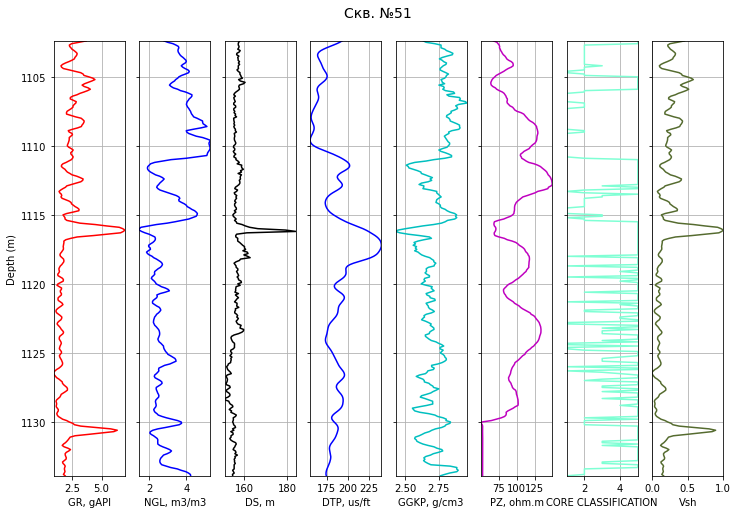

In [12]:
log_plot(df)

### Сохранение нового las-файла

In [ ]:
las.write(path+"/"+str(well_name)+'_processed.las', version=2.0)